In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Data Collection
stock = 'TCS.NS'
data = pd.read_csv('TCS.NS.csv')
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
# Step 2: Simple Moving Average (SMA) Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

def buy_signal(row):
    return row['SMA_20'] > row['SMA_50']

def sell_signal(row):
    return row['SMA_20'] < row['SMA_50']

data['Signal'] = 0
data.loc[data.apply(buy_signal, axis=1), 'Signal'] = 1
data.loc[data.apply(sell_signal, axis=1), 'Signal'] = -1

In [5]:
# Step 3: Backtesting
initial_capital = 100000
position_size = 1000
trade_log = []

for i in range(len(data)):
    if data.iloc[i]['Signal'] == 1:
        trade_log.append({'Date': data.index[i], 'Type': 'Buy', 'Quantity': position_size, 'Price': data.iloc[i]['Close']})
    elif data.iloc[i]['Signal'] == -1:
        trade_log.append({'Date': data.index[i], 'Type': 'Sell', 'Quantity': position_size, 'Price': data.iloc[i]['Close']})

total_returns = 0
num_trades = len(trade_log)
winning_trades = 0
losing_trades = 0
max_drawdown = 0

for i in range(len(trade_log) - 1):
    if trade_log[i]['Type'] == 'Buy':
        profit_loss = trade_log[i+1]['Price'] - trade_log[i]['Price']
        total_returns += profit_loss
        if profit_loss > 0:
            
            winning_trades += 1
        else:
            losing_trades += 1
        if profit_loss < max_drawdown:
            max_drawdown = profit_loss

In [9]:
# Step 4: Reporting
winning_trade_pct = (winning_trades / num_trades) * 100
losing_trade_pct = (losing_trades / num_trades) * 100

report = """
**Strategy Performance Report**

**Total Returns:** ₹{total_returns:.2f}
**Number of Trades:** {num_trades}
**Winning Trades (%):** {winning_trade_pct:.2f}%
**Losing Trades (%):** {losing_trade_pct:.2f}%
**Maximum Drawdown:** ₹{max_drawdown:.2f}

**Insights:**
The strategy generated a total return of ₹{total_returns:.2f} with {num_trades} trades. The winning trade percentage was {winning_trade_pct:.2f}%, and the losing trade percentage was {losing_trade_pct:.2f}%. The maximum drawdown was ₹{max_drawdown:.2f}.
""".format(
    total_returns=total_returns,
    num_trades=num_trades,
    winning_trade_pct=winning_trade_pct,
    losing_trade_pct=losing_trade_pct,
    max_drawdown=max_drawdown
)

print(report)


**Strategy Performance Report**

**Total Returns:** ₹622.90
**Number of Trades:** 444
**Winning Trades (%):** 32.43%
**Losing Trades (%):** 33.56%
**Maximum Drawdown:** ₹-175.20

**Insights:**
The strategy generated a total return of ₹622.90 with 444 trades. The winning trade percentage was 32.43%, and the losing trade percentage was 33.56%. The maximum drawdown was ₹-175.20.



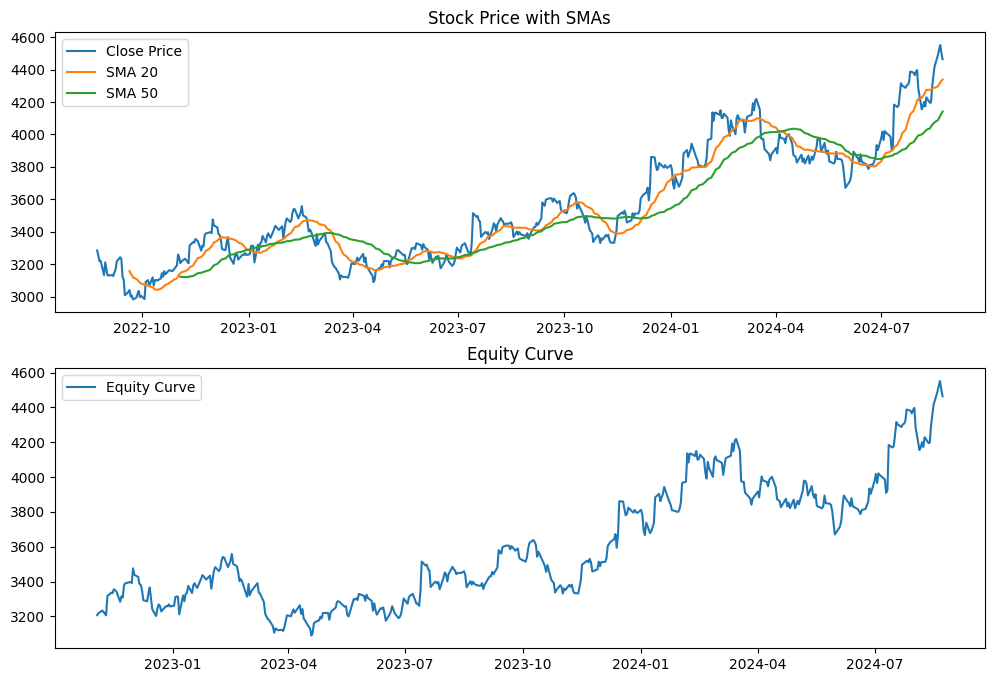

In [10]:
# Plot the stock price with SMAs and equity curve
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(data.index, data['Close'], label='Close Price')
ax[0].plot(data.index, data['SMA_20'], label='SMA 20')
ax[0].plot(data.index, data['SMA_50'], label='SMA 50')
ax[0].set_title('Stock Price with SMAs')
ax[0].legend()

ax[1].plot([trade_log[i]['Date'] for i in range(len(trade_log))], [trade_log[i]['Price'] for i in range(len(trade_log))], label='Equity Curve')
ax[1].set_title('Equity Curve')
ax[1].legend()

plt.show()